In [44]:
import numpy as np
import matplotlib.pyplot as plt



# 1) Perceptron learning algorithm

## a) Data Generation

In [45]:
# Target Boundary
tar_boun = np.zeros((3,))

tar_boun[0] = input("Give the x coeff of decision boundary :")
tar_boun[1] = input("Give the y coeff of decision boundary :")
tar_boun[2] = input("Give the constant term of decision boundary :")

Give the x coeff of decision boundary :5
Give the y coeff of decision boundary :6
Give the constant term of decision boundary :-8


In [46]:
# no.of data points generated randomly
no_data_points = np.random.randint(1000,2000)

print("No. of data points in the data set are ",no_data_points)

No. of data points in the data set are  1834


In [47]:
# Level seperability
γ = float(input("Level of seperability :"))

Level of seperability :0.7


In [48]:
#  Calculates algebraic distance between a line and point.
def alge_dist (line,point):
    sum = 0
    for i in range(len(line)):
        if i != len(line) - 1 :
          sum+= line[i]*point[i]
        else :
          sum+= line[i]*1
    return sum

In [49]:
# Using the intercepts of line we are deciding the range of random numbers to be generated.

low = min([-tar_boun[2]/tar_boun[0],-tar_boun[2]/tar_boun[1],0])

high = max ([-tar_boun[2]/tar_boun[0],-tar_boun[2]/tar_boun[1],0])

# Tan_θ is slope of line perpendicular to target boundary.
cos_θ = tar_boun[0]/np.sqrt(tar_boun[0]**2 + tar_boun[1]**2)

sin_θ = tar_boun[1]/np.sqrt(tar_boun[0]**2 + tar_boun[1]**2)

print(low,high,cos_θ,sin_θ)

0 1.6 0.6401843996644799 0.7682212795973759


In [50]:
def generate_data(points,γ):
    
 linear_data = np.zeros((points,3))

 for i in range(points):

  x = np.random.uniform(int(low),int(high),(2,))
  
  dist_x = alge_dist(tar_boun,x)

# Classes of points are giving depending on the dist from target boundary.
  if dist_x > γ :
      x = np.append(x,1)
      linear_data[i] = x
   
  elif dist_x < - γ :
      x = np.append(x,-1)
      linear_data[i] = x
  
  
  else :
#      With 0.5 prob we are taking image of point if point is in b/w γ distance from target boundary
    if  np.random.uniform() < 0.5 :
         if dist_x > 0 :
          x[0] = x[0] + (γ - abs(dist_x))*cos_θ
          x[1] = x[1] + (γ - abs(dist_x))*sin_θ
          x = np.append(x,1)
      
         else :
          x[0] = x[0] - (γ - abs(dist_x))*cos_θ
          x[1] = x[1] - (γ - abs(dist_x))*sin_θ
          x = np.append(x,-1)
       
    else :
         if dist_x > 0 :
          x[0] = x[0] + 2*(γ - abs(dist_x))*cos_θ
          x[1] = x[1] + 2*(γ - abs(dist_x))*sin_θ  
          x = np.append(x,1)
         else :
          x[0] = x[0] - 2*(γ - abs(dist_x))*cos_θ
          x[1] = x[1] - 2*(γ - abs(dist_x))*sin_θ
          x = np.append(x,-1)
         linear_data[i] = x

 return linear_data

In [51]:
linear_data = generate_data(no_data_points,γ)
print(linear_data)

[[ 0.          0.          0.        ]
 [ 0.21839299  0.74216461 -1.        ]
 [ 0.75726443  0.11701296 -1.        ]
 ...
 [ 0.8275153   0.94198338  1.        ]
 [ 0.89513612  0.01171302 -1.        ]
 [ 0.22599248  0.66247671 -1.        ]]


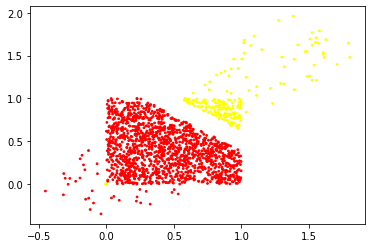

In [52]:
# Plot of linearly seperable dataset.

colors = ["red" if i == -1 else "yellow" for i in linear_data[:,2]]
plt.scatter(linear_data[:,0],linear_data[:,1],c = colors,s = 3)
plt.show()


## b) Perceptron Learning Algorithm

In [53]:
# labels of the data
labels = linear_data[:,2]


In [54]:
#  Generating random weights and bias for Perceptron
W_percep = np.random.uniform(low,high,(2,))
bias_percep = np.random.uniform(low,high)


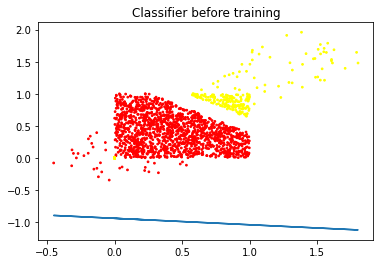

In [55]:
# Plot before training the classfier
plt.scatter(linear_data[:,0],linear_data[:,1],c = colors,s = 3)
plt.plot(linear_data[:,0],(-W_percep[0]*linear_data[:,0] - bias_percep)/W_percep[1])
plt.title("Classifier before training")
plt.show()

In [56]:
epochs = 10

for k in range(epochs):
  
  mis_cls_1 = 0  
  
  for i in range(no_data_points):  
    
    if labels[i]*(np.dot(W_percep,linear_data[i,:2]) + bias_percep) < 0 :
        W_percep = W_percep  + labels[i]*linear_data[i,:2]
        bias_percep = bias_percep + labels[i]
        mis_cls_1 +=1
  
  if mis_cls_1 == 0 :
    print("No.of misclassified points after {} epochs are {}".format(str(k+1),str(mis_cls_1)))
    break
  print("No.of misclassified points after {} epochs are {}".format(str(k+1),str(mis_cls_1)))       


No.of misclassified points after 1 epochs are 22
No.of misclassified points after 2 epochs are 0


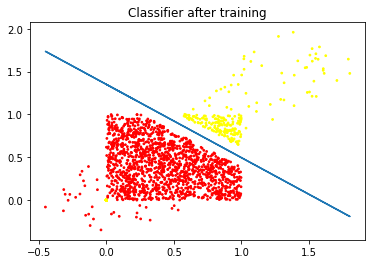

In [57]:
# Plot after training the classifier.

plt.scatter(linear_data[:,0],linear_data[:,1],c = colors,s = 3)
plt.plot(linear_data[:,0],(-W_percep[0]*linear_data[:,0] - bias_percep)/W_percep[1])
plt.title("Classifier after training")
plt.show()

## c) Analysis

In [58]:
no_data_points_ana = np.random.randint(1000,2000)

γ_ana = np.linspace(0.3,0.9,5)
analyse_data = np.zeros((no_data_points_ana,3))


In [59]:

perf_k = []
for i in γ_ana:
 analyse_data = generate_data(no_data_points_ana,i) 
 labels_ana = analyse_data[:,2]
 iter_k = []
    
 for j in range(5):
    total_mis = 0
    W_ana = np.random.uniform(low,high,(2,))
    bias_ana = np.random.uniform(low,high)
    while True:
  
     mis_cls_1 = 0 
  
     for k in range(no_data_points_ana):  
    
      if labels_ana[k]*(np.dot(W_ana,analyse_data[k,:2]) + bias_ana) < 0 :
        W_ana = W_ana  + labels_ana[k]*analyse_data[k,:2]
        bias_ana = bias_ana + labels_ana[k]
        mis_cls_1 +=1
     
     
     total_mis += mis_cls_1
    
     if mis_cls_1 == 0 :
        iter_k.append(total_mis)
        break
 perf_k.append(np.mean(iter_k)) 

> From the plot it is evident that as level of seperability increases the no.of iterations will tend to decrease since upper bound of k is inversely proportional to level of seperability
 $$
  \begin{align}
    k \leq \frac{R^{2}}{\gamma}
  \end{align}
 $$

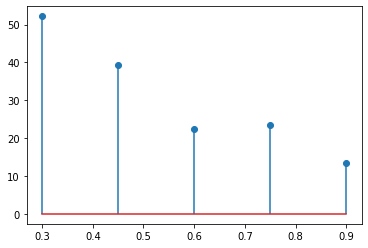

In [60]:
plt.stem(γ_ana,perf_k)
plt.show()

# 2) Gradient descent for training a linear classifier


## a) Loss Function Formulation

- In question we are asked to design a classifier which classifies linearly seperable 2D dataset.
-   Since the task at hand is classification, we are tend to choose 0-1 loss function which is reasonable as label set is discrete.
-   But since the loss function is not continuous and differentiable, it is computationally intractable.
-   So in general we will some surrogate loss functions which has good mathematical properties while maintaining the characteristics of 0-1 loss.


In [61]:
def zero_one_ls(x):
    
    if x < 0 :
        return 1
    
    else :
        return 0


> One can use **Hinge Loss** which relaxes the strict constraint of 0-1 loss when the point is misclassified ( in the neighbourhood of x = 0 ).

In [62]:
def hinge_ls(x):
    
    return max(0,1-x)

> Eventhough Hinge loss is continuous and retain the characteristics of 0-1 loss it's derivative is not continuous at x = 1, so one can opt **Squared Hinge Loss** which is both continuous and differentiable at x = 1.  

In [63]:
def squre_hinge_ls(x):
    return hinge_ls(x)**2

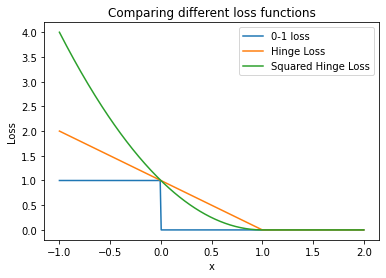

In [64]:

x = np.linspace(-1,2,300)

# Plot of zero-one loss.
vec_zero_one_loss = np.vectorize(zero_one_ls)
plt.plot(x,vec_zero_one_loss(x),label = "0-1 loss")

# Plot of Hinge loss.
vec_hinge_ls = np.vectorize(hinge_ls)
plt.plot(x,vec_hinge_ls(x),label = "Hinge Loss")

# Plot of Squared Hinge loss.
vec_squre_hinge_ls = np.vectorize(squre_hinge_ls)
plt.plot(x,vec_squre_hinge_ls(x),label = "Squared Hinge Loss")

plt.xlabel("x")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparing different loss functions")

plt.show()

> We will use Squared Hinge Loss while designing the classifier for 2D linearly seperable data.

## b) Gradient Computation


The loss function that we took is,
   $$\begin{align}
     L = \begin{cases} 
           (1-x)^2      &, x \leq 1 \\
            0           & \text{otherwise}
         \end{cases}
   \end{align}$$
   
 Since the data is linearly seperable, we will try to find a hyper plane which classifies the data. Let say our 
 prediction be $y_{pred}$,
   $$ 
    \begin{align}
      y_{pred} = sign(w^{T}x + b)
    \end{align}
   $$
   where $w$ are weight vector of same dimension as $x$ and $b$ is bias.  
   
 In other words,we want to make $ y_{i}(w^{T}x_{i} + b) > 0 $ for each $i^{th}$ sample in the data.  
 
 So our loss function will be
     $$\begin{align}
     L_{i} = \begin{cases} 
           (1-y_{i}*(w^{T}x_{i} + b))^2      &,y_{i}*(w^{T}x_{i} + b)  \leq 1 \\
            0           & \text{otherwise}
         \end{cases}
   \end{align}$$
   For total data set we generally average the individual losses.
    $$\begin{align}
     L = \frac{1}{N}\sum_{i = 1}^{n}L_{i}
   \end{align}$$
  To minimise the loss function, we will find **gradient** of L w.r.t weights and bias and after solving it looks like,  
  $$
  \begin{align}
    \frac{\partial L}{\partial w} &= \frac{1}{N}\sum_{i=1}^{N}-2x_iy_i\,Hingloss(y_{i}*(w^{T}x_{i} + b)) \\
    \frac{\partial L}{\partial b} &= \frac{1}{N}\sum_{i=1}^{N}-2y_i \,Hingloss(y_{i}*(w^{T}x_{i} + b))
  \end{align}
  $$
  Here using *Hingloss* will also check the case when the point is classified correctly.

In [65]:
# In code when we say y_pred we mean y(w^Tx + b) not sign(y(w^Tx + b)).

# Here we computed gradients for a sample not entire data set.

def gradient_w(point,label,y_pred) :
    if y_pred*label <= 1:
        return -2*label*point*(1 - label*y_pred)
    else :
        return 0
  

def gradient_bias(label,y_pred):
    if y_pred*label <=1:
       return -2*label*(1 - label*y_pred)
    else :
       return 0

## c) Update equation 

To train the classifier, we will adjust the parameters using the gradients under the learning rate $\eta$,
   $$
   \begin{align}
     w = w - \eta*\frac{\partial L}{\partial w} \\
     b = b - \eta*\frac{\partial L}{\partial b}
   \end{align}
   $$ 

In [66]:
# Generate weights and bias for gradient descent.

W_grad = np.random.uniform(-1,1,(2,))

bias_grad = np.random.uniform(-1,1)

η = 0.05 # learning rate


In [67]:
lr_w = np.zeros((2,)) # value learned by weights
lr_bias = 0 # value learned by bias

for epoch in range(200):
 
 total_loss = 0
 
 mis_cls2 = 0
 
 for i in range(no_data_points):
    
    y_pred = np.dot(W_grad,linear_data[i,:2]) + bias_grad
    if y_pred*labels[i] < 0 :
        mis_cls2 += 1
    total_loss += squre_hinge_ls(y_pred*labels[i])
    
    lr_w += gradient_w(linear_data[i,:2],labels[i],y_pred) 
    
    lr_bias += gradient_bias(labels[i],y_pred)
    
 total_loss = total_loss/no_data_points

 if mis_cls2 == 0 :
    print("No. of misclassifications at the epoch {} is {}".format(epoch,mis_cls2))
    break
 
 print("No. of misclassifications at the epoch {} is {}".format(epoch,mis_cls2))
 
 W_grad  = W_grad - η*(lr_w)/no_data_points # weights update
 
 bias_grad = bias_grad - η*(lr_bias)/no_data_points # bias update

No. of misclassifications at the epoch 0 is 1504
No. of misclassifications at the epoch 1 is 1504
No. of misclassifications at the epoch 2 is 1428
No. of misclassifications at the epoch 3 is 663
No. of misclassifications at the epoch 4 is 214
No. of misclassifications at the epoch 5 is 214
No. of misclassifications at the epoch 6 is 214
No. of misclassifications at the epoch 7 is 214
No. of misclassifications at the epoch 8 is 214
No. of misclassifications at the epoch 9 is 214
No. of misclassifications at the epoch 10 is 214
No. of misclassifications at the epoch 11 is 214
No. of misclassifications at the epoch 12 is 214
No. of misclassifications at the epoch 13 is 214
No. of misclassifications at the epoch 14 is 214
No. of misclassifications at the epoch 15 is 214
No. of misclassifications at the epoch 16 is 212
No. of misclassifications at the epoch 17 is 170
No. of misclassifications at the epoch 18 is 59
No. of misclassifications at the epoch 19 is 80
No. of misclassifications at 

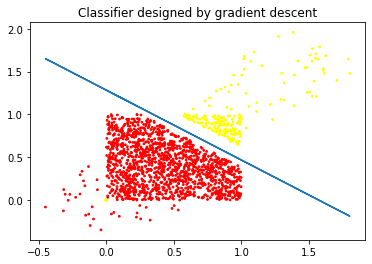

In [68]:
# Plot of classifer designed by gradient descent.

plt.scatter(linear_data[:,0],linear_data[:,1],c = colors,s = 3)
plt.plot(linear_data[:,0],(-W_grad[0]*linear_data[:,0] - bias_grad)/W_grad[1])
plt.title("Classifier designed by gradient descent")
plt.show()

# 3) MLP with a single hidden layer

In [69]:
# computes distance between two points
def dist (point1,point2):
    sum = 0
    for i in range(len(point2)):
        sum += (point1[i] - point2[i])**2
    return np.sqrt(sum)

In [70]:
# radius of inner and outer circle of concentric circles
rad_inner = float(input("Enter the radius of inner circle "))
rad_outer = float(input("Enter the radius of outer circle "))

Enter the radius of inner circle 8
Enter the radius of outer circle 10


In [71]:
no_data_points_2 = np.random.randint(1000,2000)

center = [0,0] # center of the circles.

non_linear_data = np.zeros((no_data_points_2,3))



In [72]:
# generating the non-linearly sepearble data.
class_blu = 0
class_gre = 0
for i in range(no_data_points_2):

  x2 = np.random.uniform(-10,10,(2,))
  
  dist_x2 = dist(x2,center)
  
  if dist_x2 > rad_outer :
      x2 = np.append(x2,1)
      non_linear_data[i] = x2
      class_blu += 1
  elif dist_x2 < rad_inner :
      x2 = np.append(x2,-1)
      non_linear_data[i] = x2
      class_gre+=1
     
  else :
      cos_θ2 = x2[0]/np.sqrt(x2[0]**2 + x2[1]**2)
      sin_θ2 = x2[1]/np.sqrt(x2[0]**2 + x2[1]**2)
      if dist_x2 < (rad_inner + rad_outer)/2  :
         x2[0] = x2[0] - (dist_x2 - rad_inner)*cos_θ2
         x2[1] = x2[1] - (dist_x2 - rad_inner)*sin_θ2
         
         x2 = np.append(x2,-1)
         class_gre += 1
      else :
         x2[0] = x2[0] + (rad_outer - dist_x2)*cos_θ2
         x2[1] = x2[1] + (rad_outer - dist_x2)*sin_θ2
         
         x2 = np.append(x2,1)
         class_blu += 1
      non_linear_data[i] = x2

In [73]:
print("Points in class -1",class_gre)
print("Points in class  1",class_blu)

Points in class -1 724
Points in class  1 387


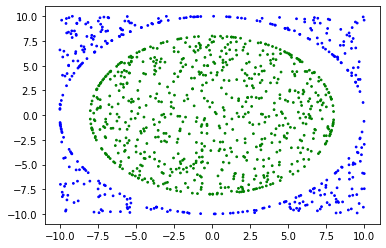

In [74]:
colors2 = ["green" if i == -1 else "blue" for i in non_linear_data[:,2]]
plt.scatter(non_linear_data[:,0],non_linear_data[:,1],c = colors2,s = 3)
plt.show()

In [75]:
# dimensions of input,hidden and output layer.
in_dim = 3 

hid_dim = 5

out_dim = 1

In [76]:
labels2 = non_linear_data[:,2]

In [77]:
# ReLU activation function
def ReLU (x):
    return max(0,x)

# Derivative of ReLU activation function.
def difReLU(x):
    if x > 0 :
        return 1
    else :
        return 0

# Function computes gradient of loss w.r.t weights b/w hidden and output layer.
def grad_hid_out(hid_out,label,y_pred):
   
    return -2*hid_out*label*hinge_ls(y_pred*label)

# Function computes gradient of loss w.r.t weights b/w input and hidden layer.
def grad_in_hid(input_vec,hid_in,W_hid_out,label,y_pred):
    in_dim = len(input_vec)
    hid_in = hid_in[0]
    hid_dim = len(hid_in)
    learn_value = np.zeros((in_dim,hid_dim))
    for i in range(in_dim):
        for j in range(hid_dim):   
          learn_value[i][j] = -2*label*hinge_ls(y_pred*label)*input_vec[i]*difReLU(hid_in[j])*W_hid_out[j]
    return learn_value

def Sigmoid (x):
    return 1/(1+ np.exp(-x))

vec_ReLU = np.vectorize(ReLU) 

In [78]:

η2 = 0.01 # learning rate

# Initialised the weights b/w layers.
W_in_hid = np.random.uniform(-1,1,(in_dim,hid_dim))

W_hid_out = np.random.uniform(-1,1,(hid_dim,out_dim))

W_in_hid = np.round(W_in_hid,decimals = 2)
W_hid_out = np.round(W_hid_out,decimals = 2)

In [79]:
epochs = 5

In [80]:
# Employed classical SGD for 'epochs' times pass of data.
for epoch in range(epochs):
 for i in range(no_data_points_2):
   x2 = non_linear_data[i,:2]
   
   x2 = np.append(x2,1)
   
   in_vec = x2
   
   hid_inputs = in_vec.reshape(1,3) @ W_in_hid
   
   hid_inputs = np.round(hid_inputs,decimals = 2)

   hid_outputs = vec_ReLU(hid_inputs)
    
   hid_outputs = np.round(hid_outputs,decimals = 2)
   
   output = hid_outputs @ W_hid_out
   
   output = output[0]

#   Back prop

   lr_hid_out = np.round(grad_hid_out(hid_outputs,labels2[i],output),decimals = 2)
   lr_hid_out = lr_hid_out.T
   
   lr_in_hid =  np.round(grad_in_hid(in_vec,hid_inputs,W_hid_out,labels2[i],output),decimals = 2)

   W_hid_out = W_hid_out - η2*lr_hid_out # updating the weight vector b/w hidden and output layer.
   
   W_hid_out = np.round(W_hid_out,decimals = 2) 
   
   W_in_hid =  W_in_hid - η2*lr_in_hid # updating the weight matrix b/w input and hidden layer
    
   W_in_hid =  np.round(W_in_hid,decimals = 2) 
  

In [81]:
pred_label = []
mis_clas = 0
for i in range(no_data_points_2) :
  
   x2 = non_linear_data[i,:2]
   
   x2 = np.append(x2,1)
   
   in_vec = x2
   
   hid_inputs = in_vec.reshape(1,3) @ W_in_hid

   hid_outputs = vec_ReLU(hid_inputs)
   
   output = hid_outputs @ W_hid_out
   
   output = output[0]
 
#   Testing 
   if Sigmoid(output) > 0.5 :
      output = 1
   else :
      output = -1
   if output !=labels2[i]:
       mis_clas += 1
   pred_label.append(output) 

In [82]:
accuracy = (1 - (mis_clas)/(no_data_points_2))*100
print(accuracy)

78.66786678667866


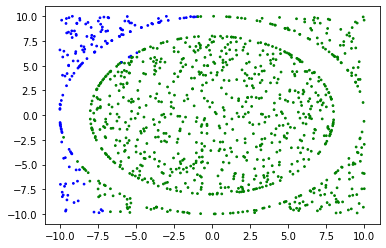

In [83]:
#  Plot of how the neural networks perfomed.
colors_pred = ["green" if i == -1 else "blue" for i in pred_label]
plt.scatter(non_linear_data[:,0],non_linear_data[:,1],c = colors_pred,s = 3)
plt.show()